In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("resnet34_3d_seg-round-2.csv")
df

,epoch,lr,loss_train,loss_val,fbeta_0.20,fbeta_0.25,fbeta_0.30,fbeta_0.35,fbeta_0.40,fbeta_0.45,...,fbeta_0.55,fbeta_0.60,fbeta_0.65,fbeta_0.70,fbeta_0.75,fbeta_0.80,fbeta_0.85,fbeta_0.90,fbeta_0.95,accuracy
0,1,4.000000e-06,0.761007,0.709786,0.150662,0.154141,0.160692,0.169882,0.181936,0.192070,...,0.232015,0.237986,0.189008,0.095327,0.025326,0.001723,0.000035,0.000000,0.000000,0.594123
1,2,6.894754e-06,0.701045,0.705531,0.152361,0.154664,0.160121,0.167010,0.174236,0.171625,...,0.059960,0.018210,0.003863,0.000112,0.000000,0.000000,0.000000,0.000000,0.000000,0.727246
2,3,1.522987e-05,0.665186,0.700779,0.153627,0.162721,0.176900,0.187632,0.194985,0.202843,...,0.196199,0.154370,0.107541,0.062384,0.027467,0.007653,0.000518,0.000000,0.000000,0.663996
3,4,2.800000e-05,0.646319,0.631574,0.183984,0.216441,0.220661,0.200305,0.159931,0.103548,...,0.020590,0.009578,0.003507,0.000212,0.000012,0.000000,0.000000,0.000000,0.000000,0.836127
4,5,4.366489e-05,0.612990,0.654781,0.192415,0.230583,0.248353,0.257146,0.260827,0.257251,...,0.209830,0.183799,0.158531,0.131942,0.104472,0.078441,0.054324,0.035011,0.015378,0.805448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,7.600093e-07,0.235080,0.654751,0.412656,0.403798,0.396355,0.389841,0.383616,0.377562,...,0.365109,0.358156,0.349666,0.338949,0.325934,0.309266,0.286466,0.254674,0.195977,0.890133
95,96,4.869946e-07,0.237898,0.645423,0.425552,0.417416,0.410661,0.404684,0.398872,0.392948,...,0.380139,0.372795,0.364574,0.354544,0.341712,0.324231,0.300577,0.265978,0.204655,0.890787
96,97,2.743041e-07,0.234944,0.653289,0.414712,0.406600,0.399658,0.393028,0.386511,0.380022,...,0.366561,0.358793,0.349852,0.339286,0.325830,0.309109,0.286262,0.251265,0.189429,0.890315
97,98,1.221970e-07,0.231325,0.654967,0.408332,0.399700,0.392392,0.385706,0.379333,0.372973,...,0.359698,0.352199,0.343831,0.333437,0.320992,0.305197,0.283942,0.253335,0.198278,0.889940


(0.3, 0.8)

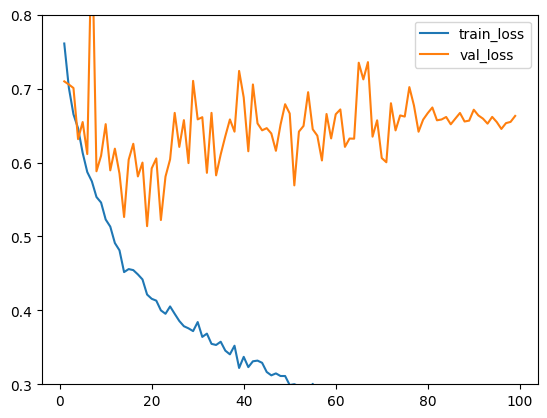

In [16]:
plt.plot(df["epoch"], df["loss_train"], label="train_loss")
plt.plot(df["epoch"], df["loss_val"], label="val_loss")
# plot the moving average of the validation loss
# plt.plot(df["epoch"], df["loss_train"].rolling(2).mean(), label="val_loss")

plt.legend()
plt.ylim(0.3, 0.8)

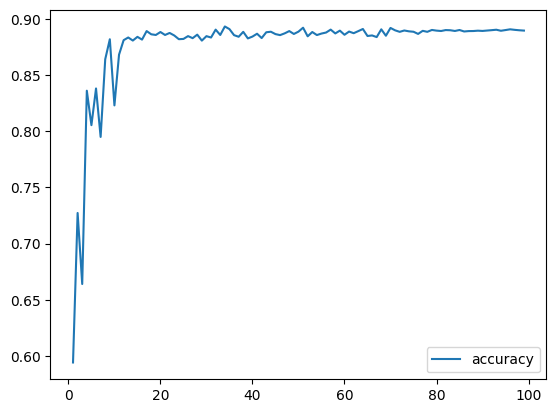

In [17]:
plt.plot(df["epoch"], df["accuracy"], label="accuracy")

plt.legend()
# plt.ylim(0.3, 0.6)

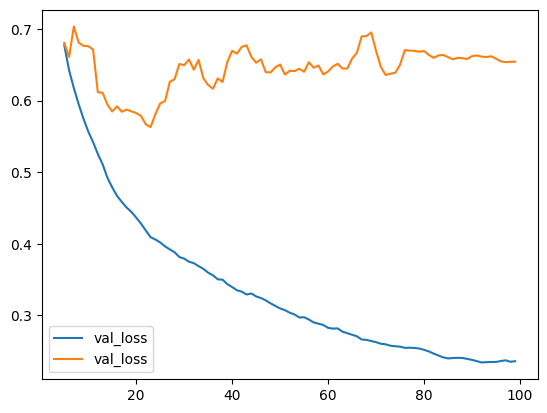

In [18]:
plt.plot(df["epoch"], df["loss_train"].rolling(5).mean(), label="val_loss")
plt.plot(df["epoch"], df["loss_val"].rolling(5).mean(), label="val_loss")

plt.legend()
# plt.ylim(0.05, 0.3)

(99, 16)


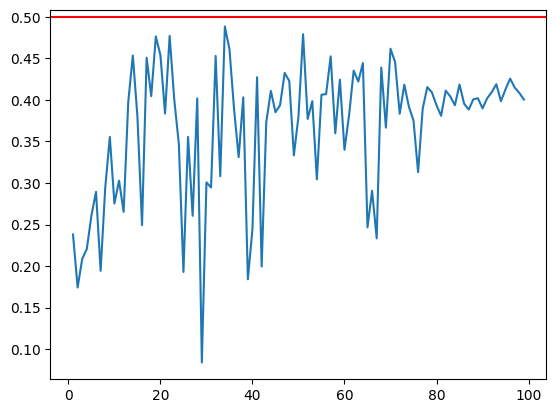

In [19]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
print(df_fbeta.shape)
df_fbeta = np.max(df_fbeta, axis=1)
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")

# put horizontal line at 0.55
plt.axhline(y=0.5, color='r', linestyle='-')


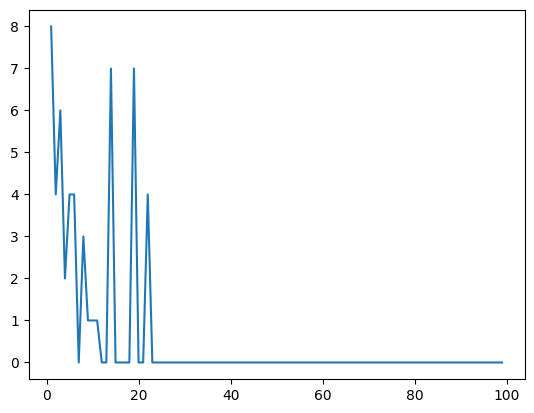

In [20]:
# take columns that start with "fbeta_"
df_fbeta = df.filter(regex=("fbeta_.*")).values
df_fbeta = np.argmax(df_fbeta, axis=1)
df_fbeta.shape
plt.plot(df["epoch"], df_fbeta, label="fbeta_max")